# Book: Machine Learning Using Python

**Authors: MANARANJAN PRADHAN & U DINESH KUMAR**

## Solutions for Exercises Chapter 7: Clustering
**Prepared By: Midhun Angathil**  

### Answer Questions 1 to 5 using the *customerspends.csv* Dataset 

An online grocery store has captured amount spent per annum (in Indian rupees) by 20 customers on apparel and beauty and healthcare products and given in the file *customerspends.csv.* It contains the following records

* Customer - CustomerID
* Apparel - Amount spent in apparel products
* Beauty and Healthcare - Amount spent in beauty and healthcare products.

#### Data Exploration:

In [55]:
#import necessary libraries
import pandas as pd
import numpy as np

#Reading data
df = pd.read_csv('C:\\Users\\Lenovo Pc\\Documents\\My solution for Chapter 7\\customerspends.csv')

In [56]:
#printing first 5 records
df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [57]:
#Checking for missing values (if any)
df.isnull().sum(axis=0)

Customer                 0
Apparel                  0
Beauty and Healthcare    0
dtype: int64

In [58]:
#Checking for negative values
df['Beauty and Healthcare'].min()

0.7

In [59]:
#Checking for negative values
df['Apparel'].min()

4.25

### Question 1: 

Create a scatter plot to depict the customer spends on apparel and beauty and healthcare products. Identify number of clusters existing in the dataset. 

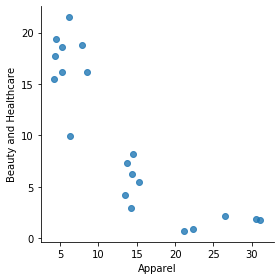

In [61]:
#importing rest of the libraries required
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#scatter plot
sn.lmplot("Apparel", "Beauty and Healthcare", data=df, fit_reg=False, size=4);

From the figure, it can be observed that there are three customer segments, which can be described as below:

**1.** One on the top-left side of the graph, depicting low-amount-spent-on-Apparel-and-high-amount-spent-on-Beauty-and-Healtcare group.

**2.** One on the bottom-left side of the graph, depicting low-amount-spent-on-Apparel-and-low-amount-spent-on-Beauty-and-Healtcare group.

**3.** One on the bottom-right side of the graph, depicting high-amount-spent-on-Apparel-and-low-amount-spent-on-Beauty-and-Healtcare group.

### Question 2: 

Normalize the features using *StandardScaler* and plot them in the scatter plot again.

In [62]:
#Importing and initializing the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Passing Dataframe to fit() method to transform the column values
scaled_customers_df = scaler.fit_transform(df[["Apparel", "Beauty and Healthcare"]])

#Printing the first 5 pairs
scaled_customers_df[0:5]

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [65]:
#Converting to a DataFrame
scaled_customers_df = pd.DataFrame(scaled_customers_df)

In [67]:
#Renaming columns
scaled_customers_df.columns = ["Apparel", "Beauty and Healthcare"]

In [70]:
#Printing first 5 rows
scaled_customers_df.head()

,Apparel,Beauty and Healthcare
0,0.892371,-1.266880
1,0.206471,-0.597753
2,-0.963181,1.228405
3,2.060855,-1.113539
4,-0.858018,1.632670


Plotting the scatter plot again using normalized feature set.

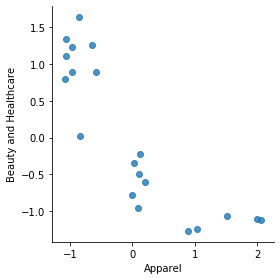

In [71]:
#scatter plot
sn.lmplot("Apparel", "Beauty and Healthcare", data=scaled_customers_df, fit_reg=False, height=4);

### Question 3: 

Use dendogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

###### Find optimal number of segments using dendogram and elbow method.

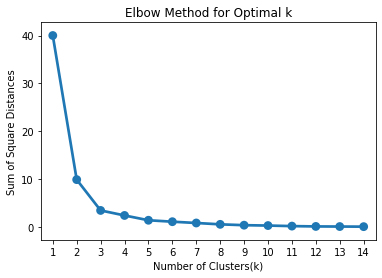

In [72]:
#Using Elbow method to print the optimal number of clusters
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++',max_iter=1000)
    km = km.fit(scaled_customers_df)
    sum_of_sq_dist[k]=km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal k")
plt.show()

Here we see that the optimal clusters would be **3** since, the graph is decreasing steadily after the point 3 after a sudden drop until 3 (hence the elbow point). 

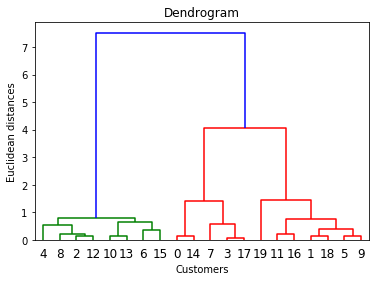

In [73]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_customers_df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Here we see that the longest heights for the clusters countably is approximately **2** on a major basis and little towards **4** on a minor basis. Averaging which we can still say the optimal number of clusters can be **3** which is clearer with the elbow method. Hence, we shall go ahead with the optimal number of clusters as **3**.

This confirms that the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

### Question 4: 

Create the number of clusters suggested by the elbow method using K-means algorithm. 

In [74]:
#import K-means
from sklearn.cluster import KMeans

#Initializing KMeans with number of clusters
clusters = KMeans(3)

#Calling fit() method with the DataFrame
clusters.fit(df)

#Concatenating it with the customers' data
df['clusterid'] = clusters.labels_

In [75]:
#Printing the first 5 customers with their cluster centers
df[0:5]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.10,0.7,1
1,2,15.23,5.5,2
2,3,5.22,18.6,0
3,4,31.10,1.8,1
4,5,6.12,21.5,0


### Question 5: 

Print the records of customers in each cluster and the cluster center of each cluster separately. Explain the clusters intuitively.

In [77]:
#Printing records of customers in clusterid = 0
df[df['clusterid'] == 0]

,Customer,Apparel,Beauty and Healthcare,clusterid
2,3,5.22,18.6,0
4,5,6.12,21.5,0
6,7,8.50,16.2,0
8,9,4.34,17.7,0
10,11,5.20,16.2,0
12,13,4.40,19.4,0
13,14,4.25,15.5,0
15,16,7.90,18.8,0


In [79]:
#Printing records of customers in clusterid = 1
df[df['clusterid'] == 1]

,Customer,Apparel,Beauty and Healthcare,clusterid
0,1,21.1,0.7,1
3,4,31.1,1.8,1
7,8,26.5,2.2,1
14,15,22.3,0.9,1
17,18,30.6,1.9,1


In [80]:
#Printing records of customers in clusterid = 2
df[df['clusterid'] == 2]

,Customer,Apparel,Beauty and Healthcare,clusterid
1,2,15.23,5.50,2
5,6,14.50,8.20,2
9,10,13.75,7.30,2
11,12,14.20,2.90,2
16,17,13.40,4.20,2
18,19,14.40,6.28,2
19,20,6.25,9.98,2


In [81]:
#printing cluster centers
clusters.cluster_centers_

array([[ 9.75      ,  5.74125   , 17.9875    ],
       [ 9.2       , 26.32      ,  1.5       ],
       [12.28571429, 13.10428571,  6.33714286]])

But these are standardized values. Hence, we can calculate the cluster centers from the original DataFrame using the information "which customers have been allocated to which segment".

The cluster center provides the average Amount spent on Apparel, average Amount spent on Beauty and Healthcare of each cluster. Of course, the customer's Amount spent on Apparel, average Amount spent on Beauty and Healthcare will vary from the cluster centers and is called the cluster variance.

In [83]:
#Printing Mean and std for Recency, Frequency and Monetary
df.groupby('clusterid')['Apparel', 'Beauty and Healthcare'].agg(["mean","std"]).reset_index()

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0   5.741250  1.646003             17.987500  2.001027
1         1  26.320000  4.599130              1.500000  0.659545
2         2  13.104286  3.077655              6.337143  2.406697

#### Interpreting the Clusters

The cluster can be interpreted as follows:

**1.** *Cluster 0*: Customers with mean Apparel of 5, Beauty and Healthcare of 17. Low Apparel and High Beauty and Healthcare.

**2.** *Cluster 1*: Customers with mean Apparel of 26, Beauty and Healthcare of 1. High Apparel and Low Beauty and Healthcare.

**3.** *Cluster 2*: Customers with mean Apparel of 13, Beauty and Healthcare of 6. Medium Apparel and Medium Beauty and Healthcare.

### Answer Questions 6 to 10 using the Dataset *Online Retail.xlsx.* 

The dataset Online Retail.xlsx and the description of the data is taken from https://archive.ics.uci.edu/ml/datasets/online+retail

Online Retail.xlsx contains records of transactions that occured between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholsalers. The attributes in the dataset are:

* *InvoiceNo -* Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts     with letter 'c', it indicates a cancellation.
* *StockCode -* Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* *Description -* Product (item) name. Nominal.
* *Quantity -* The quantities of each product (item) per transaction. Numeric.
* *InvoiceDate -* Invoice Date and time. Numeric, the day and time when each transaction was generated.
* *UnitPrice -* Unit price. Numeric, Product price per unit in sterling.
* *CustomerID -* Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* *Country -* Country name. Nominal, the name of the country where each customer resides.

### Data Exploration and Preparation

In [1]:
#Reading data
data = pd.read_excel('C:\\Users\\Lenovo Pc\\Documents\\My solution for Chapter 7\\Online Retail.xlsx')

In [3]:
#Exploring the top 5 rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Checking the shape of the dataset
data.shape

(541909, 8)

We have a total of 541909 rows and 8 columns in this dataset

We now check for missing values in the dataset

In [5]:
#Checking for missing values (if any)
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Description column can be ignored. However, CustomerID cannot be null. Hence, retaining only those customers that have a CustomerID mentioned.

In [6]:
#Retaining non-null CustomerIDs and ignoring Description
data = data[pd.notnull(data['CustomerID'])]

Some more clean ups that need to be done: First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).

In [7]:
#Removing spaces of some of those descriptions 
data['Description'] = data['Description'].str.strip()

#Removing rows that do not have invoice numbers 
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

#Remove credit transactions (those with invoice numbers containing C)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data = data[~data['InvoiceNo'].str.contains('C')]

Quantity cannot be negative. Hence, checking for the same:



In [8]:
#Checking for negative values in Quantity
data.Quantity.min()

1

Similarly Unit Price cannot be negative. Checking for the same:

In [9]:
#Checking if Unit Price is negative
data.UnitPrice.min()

0.0

In [10]:
#Converting type of InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
#Checking shape of data
data.shape

(397924, 8)

Turning our attention to StockCode, We notice a handful of non-product related codes (‘Postage’, ‘Bank Charges’, ‘Gift Vouchers’, etc.).

In [12]:
#Converting StockCode type
data['StockCode'] = data['StockCode'].astype('str')

#Excluding rows that match the specified non-product related codes
data = data[~data['StockCode'].str.contains('AMAZONFEE|BANK CHARGES|C2|DCGSSBOY|DCGSSGIRL|DOT|gift_0001_|PADS|POST|M')]

In [13]:
#Checking shape of data
data.shape

(396070, 8)

### Question 6: 

Select only the transactions that have occured during the period 06/01/11 and 11/30/11 and create a new subset of data. For answering Questions 7 to 10, use this subset of data.

In [14]:
#Subsetting dataframe making use of the InvoiceDate column
Data_Subset = data[(data['InvoiceDate'] >= '2011-06-01') & (data['InvoiceDate'] <= '2011-11-30')]

#resetting index of the dataframe
Data_Subset.reset_index(inplace=True, drop=True)

In [15]:
#Viewing the result
Data_Subset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom


In [16]:
#Checking if the oldest row of this dataset pertains to 06/01/11 or later
Data_Subset['InvoiceDate'].min()

Timestamp('2011-06-01 07:37:00')

In [17]:
#Checking if the latest row of this dataset pertains to 11/30/11 or older
Data_Subset['InvoiceDate'].max()

Timestamp('2011-11-29 18:14:00')

The dataset is now ready for answering Questions 7 to 10.

### Question 7:

Calculate the RFM values for each customer (by customer id). RFM represents

* R (Recency) - Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of November 2011, then the Recency should be 0. If purchase is made in October 2011 then Recency should be 1 and so on and so forth.

* F (Frequency) - Number of invoices by the customer from 06/01/11 to 11/30/11.

* M (Monetary Value) - Total spend by the customer from 06/01/11 to 11/30/11.

**Recency** = Current Date - Last Invoice Data

**Frequency** = Count of invoice no. of transactions(s)

**Monetary** = Sum of Total Amount for each customer

In [18]:
import datetime as dt

#Adding a new column called Total Amount
data['Total Amount'] = data['Quantity'] * data['UnitPrice']

#Setting current date as 2011-11-30 as last invoice date was on 2011-11-29
current_date = dt.datetime(2011,11,30)

#Creating RFM Modelling scores for each customer (This creates the calculations for Recency, Frequency and Monetary)
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days, 
                                               'InvoiceNo': lambda x: len(x), 
                                               'Total Amount': lambda x: x.sum()})

In [19]:
#Converting InvoiceDate to type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Renaming these calculations as Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'Total Amount':'Monetary'},inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,315,1,77183.60
1,12347.0,-8,182,4310.00
2,12348.0,65,27,1437.24
3,12349.0,8,72,1457.55
4,12350.0,300,16,294.40


In [20]:
#Split into 4 segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [21]:
quantiles

{'Recency': {0.25: 7.0, 0.5: 40.0, 0.75: 132.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 305.345, 0.5: 668.0749999999999, 0.75: 1630.6649999999997}}

In [22]:
#Function to create R,F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [23]:
#Calculating R,F and M segment values based on the quantile distribution of Recency, Frequency and Monetary values

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args = ('Frequency', quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args = ('Monetary', quantiles,))

RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,315,1,77183.60,4,4,1
12347.0,-8,182,4310.00,1,1,1
12348.0,65,27,1437.24,3,3,2
12349.0,8,72,1457.55,2,2,2
12350.0,300,16,294.40,4,4,4


In [24]:
#Calculate and add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and all RFMScore value column showing total sum of RGMGroup values
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,315,1,77183.60,4,4,1,441,9
12347.0,-8,182,4310.00,1,1,1,111,3
12348.0,65,27,1437.24,3,3,2,332,8
12349.0,8,72,1457.55,2,2,2,222,6
12350.0,300,16,294.40,4,4,4,444,12


In [40]:
RFMScores['RFMScore'].min()

3

In [41]:
RFMScores['RFMScore'].max()

12

### Question 8:

Use dendogram and elbow method to identify how many customer segments exist, using the RFM values for each customer created in Question 7.

We begin by checking the descriptive statistics and the distribution plot of Recency, Frequency and Monetary

In [25]:
RFMScores['Recency'].describe()

count    4334.000000
mean       82.229349
std       100.172998
min       -10.000000
25%         7.000000
50%        40.000000
75%       132.000000
max       363.000000
Name: Recency, dtype: float64

E:\Anaconda_Navigator\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


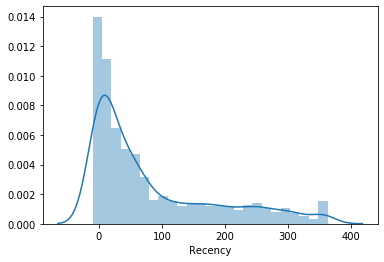

In [26]:
import seaborn as sns

sns.distplot(RFMScores['Recency'])

It is skewed to the right

Similarly checking the distributions of Frequency and Monetary

In [27]:
RFMScores['Frequency'].describe()

count    4334.000000
mean       91.386710
std       227.650243
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7809.000000
Name: Frequency, dtype: float64

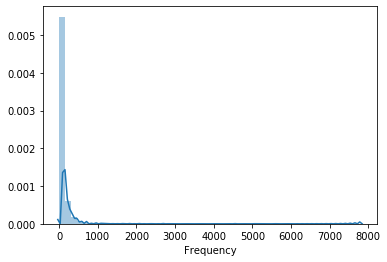

In [28]:
sns.distplot(RFMScores['Frequency'])

In [29]:
RFMScores['Monetary'].describe()

count      4334.000000
mean       2020.672296
std        8906.405610
min           0.000000
25%         305.345000
50%         668.075000
75%        1630.665000
max      279138.020000
Name: Monetary, dtype: float64

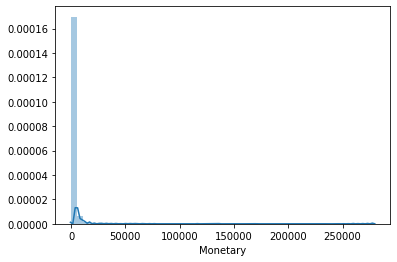

In [30]:
sns.distplot(RFMScores['Monetary'])

**Hence we see that all these measures are skewed to the right and would need to be normalized**

Now to apply K-Means algorithm we need to scale the data since the 3 measures (Recency, Frequency and Monetary) are in different scales and also normalize them since they are skewed distributions (Right Skew)

In [31]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_negNZero(num):
    if num <= 0:
        return 1
    else:
        return num
    
#Apply handle_negNZero function to Recency and Monetary columns
RFMScores['Recency'] = [handle_negNZero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_negNZero(x) for x in RFMScores.Monetary]

#Perform Log Transformation to bring data into normal or near normal distribution
Log_Transf_data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

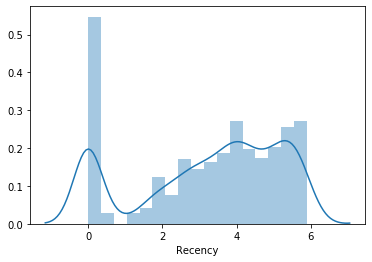

In [32]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Transf_data['Recency']
ax = sns.distplot(Recency_Plot)

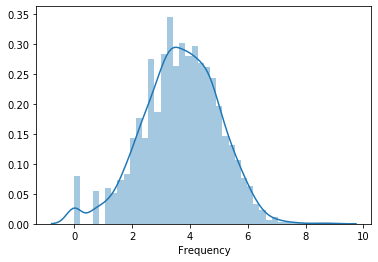

In [33]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Transf_data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

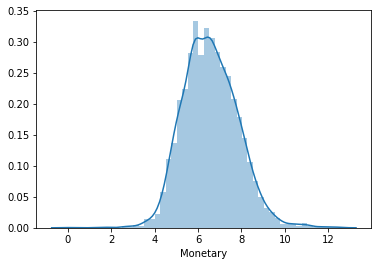

In [34]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Transf_data.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

**Now that the data is normalized. We can move on to scaling the data:**

In [35]:
from sklearn.preprocessing import StandardScaler

#Bring data to the same scale
Scaler_obj = StandardScaler()
Scaled_Data = Scaler_obj.fit_transform(Log_Transf_data)

#Transform it back to a dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns=Log_Transf_data.columns)

###### Find optimal number of segments using dendogram and elbow method.

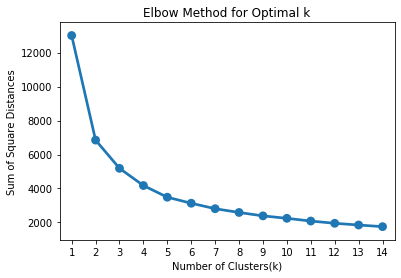

In [36]:
#impoting a necessary library
import matplotlib.pyplot as plt

#Using Elbow method to print the optimal number of clusters
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++',max_iter=1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k]=km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal k")
plt.show()

Here we see that the optimal clusters would be **2** since, the graph is decreasing steadily after the point 2 after a sudden drop until 2 (hence the elbow point). 

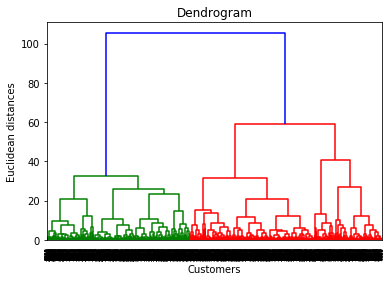

In [37]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Again we see that the longest heights for the clusters countably is **2** and we got the same value from elbow method as well. Hence we shall go ahead with the optimal number of clusters as **2**.

### Question 9:

Create the customer segments with K-means algorithm by using number of clusters suggested by elbow method.

##### Create final segment of customers and label the customers based on which segment they belong to.

In [38]:
#Building the K-Means clustering Model
KMeans_Cluster = KMeans(n_clusters=2, init='k-means++', max_iter=1000)
KMeans_Cluster.fit(Scaled_Data)

#Find the Clusters for the observations given in the dataset
RFMScores['Cluster'] = KMeans_Cluster.labels_

#Printing the first 5 rows of the dataset
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,
12346.0,315,1,77183.60,4,4,1,441,9,1
12347.0,1,182,4310.00,1,1,1,111,3,0
12348.0,65,27,1437.24,3,3,2,332,8,1
12349.0,8,72,1457.55,2,2,2,222,6,0
12350.0,300,16,294.40,4,4,4,444,12,1


In [44]:
#printing last 5 rows of the dataset
RFMScores.tail()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,
18280.0,267,10,180.60,4,4,4,444,12,1
18281.0,170,7,80.82,4,4,4,444,12,1
18282.0,1,12,178.05,1,4,4,144,9,1
18283.0,1,754,2088.93,1,1,1,111,3,0
18287.0,32,70,1837.28,2,2,1,221,5,0


### Question 10:

Print the cluster centers of each customer segment and explain them intuitively. 

In [46]:
#printing cluster centers
KMeans_Cluster.cluster_centers_

array([[-0.76222131,  0.81739822,  0.80758532],
       [ 0.569285  , -0.61049532, -0.6031663 ]])

But these are standardized values. Hence, we can calculate the cluster centers from the original DataFrame using the information "which customers have been allocated to which segment".

The cluster center provides the average Monetary, average Frequency and average Monetary value of each cluster. Of course, the customer's Recency, Frequency and Monetary values will vary from the cluster centers and is called the cluster variance.

In [48]:
#Printing Mean and std for Recency, Frequency and Monetary
RFMScores.groupby('Cluster')['Recency', 'Frequency', 'Monetary'].agg(["mean","std"]).reset_index()

Cluster     Recency               Frequency                Monetary  \
                 mean         std        mean        std         mean   
0       0   20.508356   36.065995  178.514825  327.34066  4039.655191   
1       1  130.288826  105.316509   26.189996   22.70415   509.896874   

                 
            std  
0  13191.311014  
1   1782.757889

#### Interpreting the Clusters

The cluster can be interpreted as follows:

**1.** *Cluster 0*: Customers with mean Recency of 20, Frequency of 178 and Monetary of 4039. Low Recency, High Frequency and High Monetary.

**2.** *Cluster 1*: Customers with mean Recency of 130, Frequency of 26 and Monetary of 509. High Recency, Low Frequency and Low Monetary.


**Overall Interpretation:** *Cluster 0* are good Customers and *Cluster 1* are average customers.